In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv("MSFT.csv")

In [44]:
df.head()

,date,Open,High,Low,closing_price,Adj Close,Volume
0,13/03/1986,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800
1,14/03/1986,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
2,17/03/1986,0.100694,0.103299,0.100694,0.102431,0.064384,133171200
3,18/03/1986,0.102431,0.103299,0.098958,0.099826,0.062746,67766400
4,19/03/1986,0.099826,0.100694,0.097222,0.098090,0.061655,47894400


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9165 entries, 0 to 9164
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9165 non-null   object 
 1   Open           9165 non-null   float64
 2   High           9165 non-null   float64
 3   Low            9165 non-null   float64
 4   closing_price  9165 non-null   float64
 5   Adj Close      9165 non-null   float64
 6   Volume         9165 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 501.3+ KB


In [46]:
#df.loc[(df!=0.0).any(axis=1)]
#df= df[df['last_traded_price'] != 0]

In [47]:
df.describe()

,Open,High,Low,closing_price,Adj Close,Volume
count,9165.000000,9165.000000,9165.000000,9165.000000,9165.000000,9.165000e+03
mean,43.388833,43.852325,42.910379,43.397503,38.264174,5.849753e+07
std,63.298715,63.935030,62.607347,63.307140,63.587948,3.838022e+07
min,0.088542,0.092014,0.088542,0.090278,0.056745,2.304000e+06
25%,4.484375,4.531250,4.421875,4.507813,2.833409,3.433120e+07
50%,26.900000,27.170000,26.639999,26.910000,18.982473,5.181320e+07
75%,41.040001,41.480000,40.340000,40.990002,29.777775,7.232360e+07
max,344.619995,349.670013,342.200012,343.109985,341.606354,1.031789e+09


In [48]:
df.date= pd.to_datetime(df.date)
df2 =df.set_index('date')

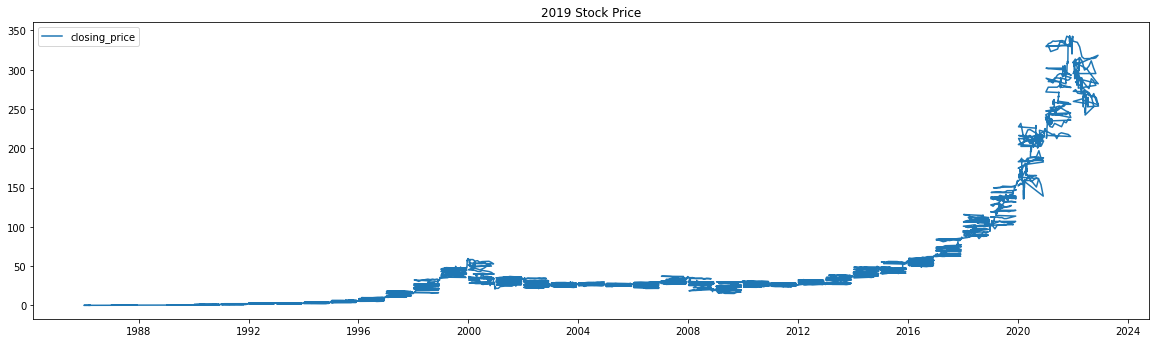

In [49]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('2019 Stock Price')
plt.plot(df2.closing_price,label='closing_price')
plt.legend()
#plt.subplot(2, 1, 2)
#plt.title('volume ')
#plt.bar(x=df2.index,height=df2['volume'])
#plt.show()

In [50]:
data = list(df2["closing_price"])

In [51]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  3.052245868341457
2. P-Value :  1.0
3. Num Of Lags :  38
4. Num Of Observations Used For ADF Regression: 9126
5. Critical Values :
	 1% :  -3.4310667587457626
	 5% :  -2.861856761388333
	 10% :  -2.566938607035052


In [52]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [54]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [55]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

9065 100


In [56]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=9.41 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=39844.269, Time=0.41 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=36008.337, Time=0.59 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=3.87 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=34798.051, Time=1.08 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=34154.527, Time=1.21 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=33724.148, Time=1.87 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=33628.419, Time=2.60 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=22.19 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=18.13 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=33630.418, Time=8.58 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 70.008 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 9165
Model:

In [70]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(5,2,0))
model = model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9165
Model:                 ARIMA(5, 2, 0)   Log Likelihood              -16808.209
Date:                Tue, 09 Aug 2022   AIC                          33628.419
Time:                        19:06:23   BIC                          33671.156
Sample:                             0   HQIC                         33642.948
                               - 9165                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9617      0.003   -337.459      0.000      -0.967      -0.956
ar.L2         -0.7256      0.004   -165.225      0.000      -0.734      -0.717
ar.L3         -0.5210      0.005   -114.392      0.000      -0.530      -0.512
ar.L4         -0.3119      0.004    -78.971      0.000      -0.320      -0.304
ar.L5         -0.1032      0.003    -36.148      0.000      -0.109      -0.098
sigma2         2.2949      0.008    289.587      0.000       2.279       2.310
===================================================================================
Ljung-Box (L1) (Q):                   5.08   Jarque-Bera (JB):            544999.98
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):             340.02   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
x_train

[0.097222,
 0.100694,
 0.102431,
 0.099826,
 0.09809,
 0.095486,
 0.092882,
 0.090278,
 0.092014,
 0.094618,
 0.096354,
 0.095486,
 0.094618,
 0.095486,
 0.096354,
 0.096354,
 0.094618,
 0.095486,
 0.097222,
 0.09809,
 0.099826,
 0.100694,
 0.100694,
 0.104167,
 0.105035,
 0.101563,
 0.101563,
 0.099826,
 0.10026,
 0.110243,
 0.117188,
 0.118056,
 0.114583,
 0.111979,
 0.110243,
 0.110243,
 0.109375,
 0.110243,
 0.110243,
 0.111111,
 0.110243,
 0.111111,
 0.111979,
 0.111111,
 0.111111,
 0.111979,
 0.110243,
 0.109375,
 0.107639,
 0.107639,
 0.107639,
 0.111111,
 0.114583,
 0.117188,
 0.121528,
 0.118056,
 0.118056,
 0.117188,
 0.118924,
 0.118924,
 0.113715,
 0.113715,
 0.113715,
 0.109375,
 0.109375,
 0.108507,
 0.110243,
 0.109375,
 0.108507,
 0.108941,
 0.110243,
 0.109375,
 0.107639,
 0.104167,
 0.103299,
 0.106771,
 0.106771,
 0.106771,
 0.108507,
 0.104167,
 0.101563,
 0.097222,
 0.094618,
 0.097222,
 0.09592,
 0.097222,
 0.100694,
 0.102431,
 0.103299,
 0.103299,
 0.106771,
 0.

In [72]:
x_test

[294.950012,
 300.190002,
 295.920013,
 289.859985,
 278.910004,
 275.850006,
 288.5,
 285.589996,
 280.070007,
 276.440002,
 287.149994,
 294.390015,
 295.220001,
 300.429993,
 299.160004,
 304.059998,
 299.48999,
 304.100006,
 303.679993,
 310.700012,
 315.410004,
 313.859985,
 308.309998,
 309.420013,
 314.970001,
 310.880005,
 299.5,
 301.369995,
 296.970001,
 285.26001,
 282.059998,
 287.619995,
 279.829987,
 280.519989,
 285.299988,
 286.359985,
 280.809998,
 274.029999,
 280.720001,
 270.220001,
 283.220001,
 289.630005,
 277.519989,
 284.470001,
 281.779999,
 289.980011,
 277.350006,
 274.730011,
 264.579987,
 269.5,
 260.549988,
 255.350006,
 261.119995,
 261.5,
 266.820007,
 254.080002,
 253.139999,
 252.559998,
 260.649994,
 259.619995,
 262.519989,
 265.899994,
 273.23999,
 271.869995,
 272.420013,
 274.579987,
 270.019989,
 268.75,
 272.5,
 270.410004,
 264.790009,
 252.990005,
 242.259995,
 244.490005,
 251.759995,
 244.970001,
 247.649994,
 253.740005,
 253.130005,
 258.

In [73]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([300.52713166, 297.12697589, 302.57599209, 298.56287732,
       289.47768387, 276.63326985, 271.712166  , 284.404146  ,
       283.84441985, 278.20807291, 275.27968138, 287.29015409,
       295.99698363, 296.94046568, 303.2191727 , 303.88665062,
       307.8029367 , 302.22199685, 305.10708707, 305.11495487,
       311.74858774, 317.6779335 , 316.75165605, 310.5507882 ,
       310.24191755, 315.69262052, 311.26255865, 298.14727133,
       298.7377026 , 295.33304107, 281.49370589, 275.8661256 ,
       282.9784435 , 277.01551043, 276.27671743, 283.3396792 ,
       286.87169935, 280.91723819, 273.01668325, 279.53062758,
       269.5644951 , 280.13965665, 290.20927986, 279.7297752 ,
       284.40483668, 283.81224781, 291.22658611, 277.83948496,
       272.9632235 , 262.85969223, 265.54834582, 256.95467529,
       250.07116749, 256.92261358, 259.92165762, 265.84551103,
       254.12418619, 251.93108258, 251.49721726, 259.11579884,
       259.06529126, 262.41082042, 267.97753   , 276.32

In [74]:
s = pd.Series(pred, index =df2.index[-100:])
s

date
2022-01-03    300.527132
2022-02-03    297.126976
2022-03-03    302.575992
2022-04-03    298.562877
2022-07-03    289.477684
                 ...    
2022-07-18    253.947042
2022-07-19    252.270741
2022-07-20    258.656884
2022-07-21    263.854588
2022-07-22    266.840140
Length: 100, dtype: float64

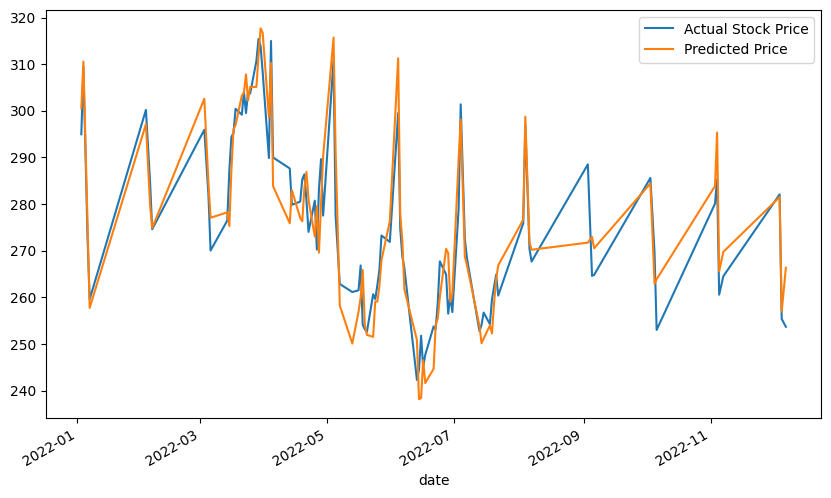

In [75]:
plt.figure(figsize=(10,6), dpi=100)
df2['closing_price'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

In [76]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.8688544403605227

In [77]:
from sklearn.metrics import mean_squared_error
mean_squared_error(x_test,pred)

44.53933960615308

In [78]:
rmse= np.sqrt(mean_squared_error(x_test, pred))
print("RMSE for  =", rmse)

RMSE for  = 6.673780008822067


In [79]:
pred_future = model.predict(start=end,end=end+30)
pred_future

array([266.84013995, 262.21673033, 263.1759157 , 264.388865  ,
       264.92370575, 265.14512542, 265.65402701, 266.48061404,
       267.14171225, 267.74937685, 268.30564821, 268.9076021 ,
       269.54959467, 270.18044961, 270.79070409, 271.39904371,
       272.01277497, 272.63278727, 273.25141864, 273.86673384,
       274.48148354, 275.09738754, 275.71410233, 276.33067121,
       276.94670917, 277.56263947, 278.1787626 , 278.79501689,
       279.41124186, 280.02738774, 280.64351358])

In [67]:
import datetime
start_date = datetime.datetime(2021,12,31)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(31)]

In [68]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2021-12-31    264.398662
2022-01-01    260.941070
2022-01-02    260.941070
2022-01-03    260.941070
2022-01-04    260.941070
2022-01-05    260.941070
2022-01-06    260.941070
2022-01-07    260.941070
2022-01-08    260.941070
2022-01-09    260.941070
2022-01-10    260.941070
2022-01-11    260.941070
2022-01-12    260.941070
2022-01-13    260.941070
2022-01-14    260.941070
2022-01-15    260.941070
2022-01-16    260.941070
2022-01-17    260.941070
2022-01-18    260.941070
2022-01-19    260.941070
2022-01-20    260.941070
2022-01-21    260.941070
2022-01-22    260.941070
2022-01-23    260.941070
2022-01-24    260.941070
2022-01-25    260.941070
2022-01-26    260.941070
2022-01-27    260.941070
2022-01-28    260.941070
2022-01-29    260.941070
2022-01-30    260.941070
dtype: float64

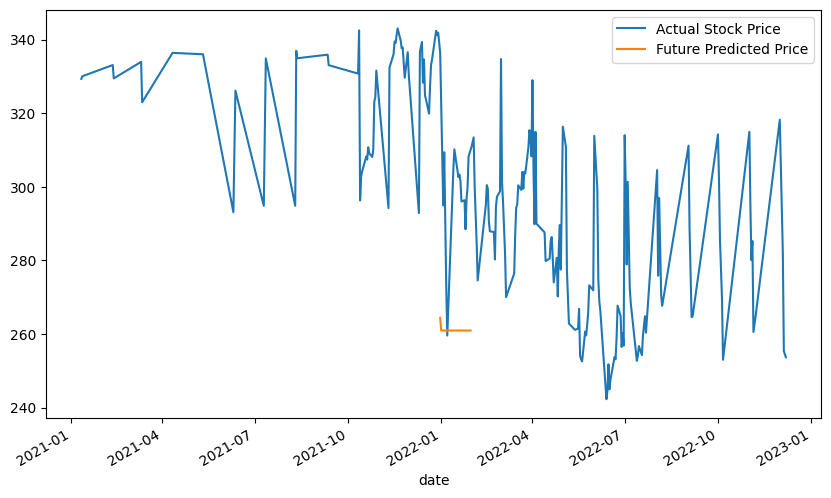

In [69]:
plt.figure(figsize=(10,6), dpi=100)
df2['closing_price'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)